In [1]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import handcalcs.render

# 基本輸入資料

## 外力資料

In [2]:
%%render  
forceP = 20 # tf,垂直力
forceH = 50 # tf,水平力

<IPython.core.display.Latex object>

## 基樁資料

In [3]:
%%render
pile_D =    80 # cm, 樁徑
pile_L =  3500 # cm, 樁長
pile_ht =    0 # cm, 突出地面樁長 
fc_prime = 210 # kgf/cm2, 混凝土強度
kh = 0.992     # kgf/cm3

<IPython.core.display.Latex object>

In [4]:
%%render
Ap = 1/4 * math.pi * pile_D**2 # cm2
Ip = 1/64* math.pi * pile_D**4 # cm4
Ep = 15100 * math.sqrt(fc_prime) # kgf/cm2

<IPython.core.display.Latex object>

In [5]:
%%render  
beta = pow((kh*pile_D)/(4*Ep*Ip),0.25) # 1/cm
beta_L = beta*pile_L 

<IPython.core.display.Latex object>

In [6]:
%%render symbol
if beta_L >= 300.0 : isLongPile = True   # 長樁
elif beta_L < 300.0: isLongPile = False  # 短樁

<IPython.core.display.Latex object>

## 基樁反力與變位

In [7]:
def plotPile(coordzList,displacementList,shearList,momentList):
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(12,6))
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    #plot 1:
    plt.subplot(1, 3, 1)
    plt.title("displacement (cm)")
    plt.ylabel("depth (m)",fontsize=12)
    lines= plt.plot(displacementList,coordzList)
    plt.setp(lines,c='red',linestyle='--') 

    #plot 2:
    plt.subplot(1, 3, 2)
    plt.title("shear (tf)")
    plt.ylabel("depth (m)",fontsize=12)
    lines= plt.plot(shearList,coordzList)
    plt.setp(lines,c='red',linestyle='--') 

    #plot 3:
    plt.subplot(1, 3, 3)
    plt.title("moment (tf-m)")
    plt.ylabel("depth (m)",fontsize=12)
    lines= plt.plot(momentList,coordzList)
    plt.setp(lines,c='red',linestyle='--') 

    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.5, 
                        hspace=0.35)

    plt.show()

In [8]:
def printDataFrame(coordzList, displacementList, momentList, shearList):

    data = {'Depth': coordzList,
            'Moment': momentList,
            'Shear': shearList,
            'Displacement': displacementList,
            }
    pd.options.display.float_format = '{:15.3f}'.format

    df = pd.DataFrame(data)
    df['Depth'] = df['Depth'].map('{:,.2f}'.format)

    pd.set_option('display.unicode.ambiguous_as_wide', True)
    pd.set_option('display.unicode.east_asian_width', True)

    max_moment = df.Moment.abs().max()
    max_shear = df.Shear.abs().max()
    max_displacement = df.Displacement.abs().max()
    
    print(df)
    print("")
    print(f"Moment        Max = {max_moment:8.2f} tf-m")
    print(f"Shear         Max = {max_shear:8.2f} tf")
    print(f"Displacement  Max = {max_displacement:8.2f} cm")
    return max_moment, max_shear, max_displacement

In [9]:
PILEDIVIDE = 50 # cm
num =  int(pile_L/PILEDIVIDE)+1

### 突出地面之樁-樁頭拘束情形
---

In [10]:
# 突出地面之樁-樁頭拘束情形
coordzList=[]  # m
momentList=[]  # tf-m
shearList=[]   # tf
displacementList=[] # cm
for i in range(num):
    coordz = i * PILEDIVIDE
    
    if coordz < pile_ht:
        coordz = (coordz - pile_ht)

        displacementList.append(1000*forceH/(12*Ep*Ip*beta**3)*(
            +2*beta**3*coordz**3
            -3*(1-beta*pile_ht)*beta**3*coordz**2
            -6*beta**2*pile_ht*coordz
            +3*(1+beta*pile_ht)))
        
        momentList.append(forceH/100/(2*beta)*(-2*beta*coordz+(1-beta*pile_ht)))
        shearList.append(-forceH)
                          
    else:
        coordz = (coordz - pile_ht)

        displacementList.append(1000*forceH/(4*Ep*Ip*beta**3)*
                                math.exp(-beta*coordz)*(
            (1+beta*pile_ht)*math.cos(beta*coordz)+
            (1-beta*pile_ht)*math.sin(beta*coordz)))
        
        momentList.append(forceH/100/(2*beta)*math.exp(-beta*coordz)*(
            (1-beta*pile_ht)*math.cos(beta*coordz)-
            (1+beta*pile_ht)*math.sin(beta*coordz)))
        shearList.append(-forceH*math.exp(-beta*coordz)*(
            math.cos(beta*coordz)-(beta*pile_ht)*
            math.sin(beta*coordz)))
        
    coordzList.append(-coordz/100)

In [11]:
moment1, shear1, displacement1 = printDataFrame(coordzList,displacementList,momentList,shearList)

     Depth          Moment           Shear    Displacement
0     0.00          96.474         -50.000           1.633
1    -0.50          73.089         -43.556           1.608
2    -1.00          52.887         -37.297           1.541
3    -1.50          35.736         -31.368           1.444
4    -2.00          21.447         -25.867           1.326
..     ...             ...             ...             ...
66  -33.00          -0.026           0.006           0.000
67  -33.50          -0.023           0.006          -0.000
68  -34.00          -0.020           0.006          -0.000
69  -34.50          -0.017           0.006          -0.000
70  -35.00          -0.014           0.005          -0.000

[71 rows x 4 columns]

Moment        Max =    96.47 tf-m
Shear         Max =    50.00 tf
Displacement  Max =     1.63 cm


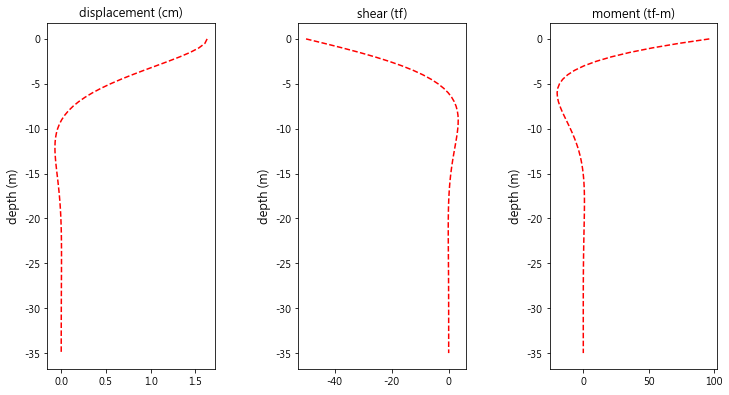

In [12]:
plotPile(coordzList,displacementList,shearList,momentList)

### 突出地面之樁-樁頭自由情形
---

In [13]:
# 突出地面之樁-樁頭自由情形
coordzList=[]  # m
momentList=[]  # tf-m
shearList=[]   # tf
displacementList=[] # cm
for i in range(num):
    coordz = i * PILEDIVIDE
    
    if coordz < pile_ht:
        coordz = (coordz - pile_ht)

        displacementList.append(1000*forceH/(6*Ep*Ip*beta**3)*(
            +beta**3*coordz**3
            +3*beta**3*pile_ht*coordz**2
            -3*beta*(1+2*beta*pile_ht)*coordz
            +3*(1+beta*pile_ht)))
        
        momentList.append(-forceH/100*(coordz+pile_ht))
        shearList.append(-forceH)
                          
    else:
        coordz = (coordz - pile_ht)

        displacementList.append(1000*forceH/(2*Ep*Ip*beta**3)*
                                math.exp(-beta*coordz)*(
            (1+beta*pile_ht)*math.cos(beta*coordz)-
            (beta*pile_ht)*math.sin(beta*coordz)))
        
        momentList.append(-forceH/100/(beta)*math.exp(-beta*coordz)*(
            (beta*pile_ht)*math.cos(beta*coordz)+
            (1+beta*pile_ht)*math.sin(beta*coordz)))
        shearList.append(-forceH*math.exp(-beta*coordz)*(
            math.cos(beta*coordz)-(1+2*beta*pile_ht)*
            math.sin(beta*coordz)))
        
    coordzList.append(-coordz/100)


In [14]:
moment2, shear2, displacement2 = printDataFrame(coordzList,displacementList,momentList,shearList)

     Depth          Moment           Shear    Displacement
0     0.00          -0.000         -50.000           3.265
1    -0.50         -21.900         -37.880           2.844
2    -1.00         -38.155         -27.410           2.436
3    -1.50         -49.574         -18.521           2.049
4    -2.00         -56.924         -11.116           1.689
..     ...             ...             ...             ...
66  -33.00          -0.029           0.014          -0.000
67  -33.50          -0.022           0.012          -0.000
68  -34.00          -0.017           0.010          -0.000
69  -34.50          -0.012           0.009          -0.000
70  -35.00          -0.008           0.007          -0.000

[71 rows x 4 columns]

Moment        Max =    62.20 tf-m
Shear         Max =    50.00 tf
Displacement  Max =     3.27 cm


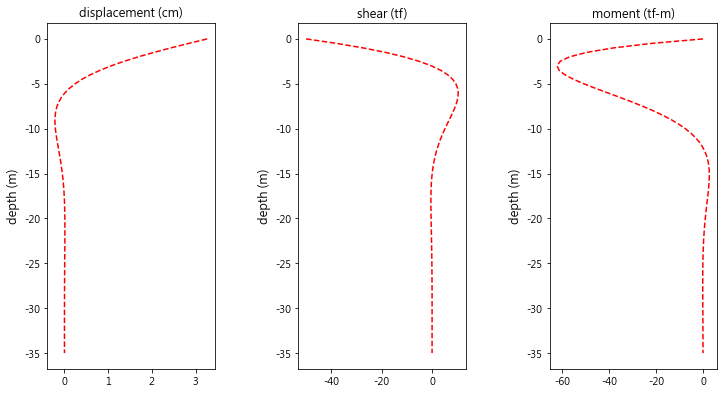

In [15]:
plotPile(coordzList,displacementList,shearList,momentList)

In [16]:
print(f"Moment        Max = {max(moment1,moment2):8.2f} tf-m")
print(f"Shear         Max = {max(shear1,shear2):8.2f} tf")

Moment        Max =    96.47 tf-m
Shear         Max =    50.00 tf
